# **<center> Programming Session  </center>**


## <center> Introduction to Neural Networks  </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/Practical-Implementations-ENPC/">
    <img src="https://drive.google.com/uc?export=view&id=11gmHR08xN5A23wZ1ZTg6L3x-xhSC9Brx" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://drive.google.com/file/d/14do2XVAxvgNJUBBOhEhPVsJafi4ISSjC/view?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Import Basic Modules
import tensorflow as tf # to create neural networks
import numpy as np # to manipulate arrays
import matplotlib.pyplot as plt # for plots 
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

# 1. Exploring the dataset

Q1. Load the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset from `tensorflow.keras.datasets`

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Q2. Preprocess the data. Each pixel value is in the range [0-255], Divide the pixel values by 255. to make the training and the testing sets in the range [0, 1] 

In [ ]:
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

Q3. Perform the one hot encoding on the labels using `to_categorical` from `tensorflow.keras.utils`:

Label 2 should be transformed into [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Q4. Plot one of the images using `plt.imshow()`

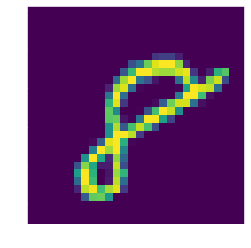

In [ ]:
plt.imshow(X_train[-1])

In [ ]:
y_train[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

Q5. Reshape the data. As we want to use a sequence of Dense layers, we should reshape the data: from a 3-dimensional tensor (N, 28, 28) into a 2-dimensional tensor (N, 784)

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

# 2. Building the model using Sequential


Q6. Create the following model using `Sequential` from `tensorflow.keras.models` and the `Dense` layer from `tensorflow.keras.layers`

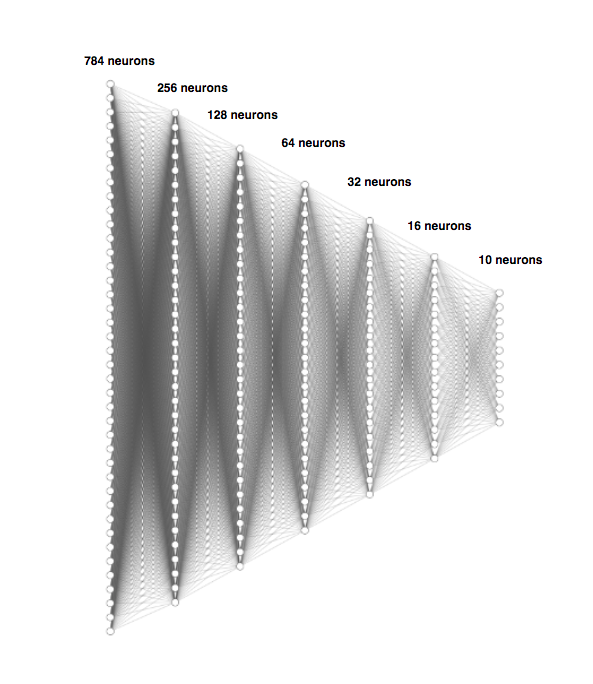

In [ ]:
Image(filename='./gdrive/My Drive/Colab_Notebooks/Session_2/images/model.png',  width=500) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 244,890
Trainable params: 244,890
Non-tr

# 3. Compile and fit the model 

Q7. Compile the model my specifying:

* The optimizer: The Stochastic Gradient Descent (as shown in the figure below).
* The loss function: [The categorical cross entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) defined as follows:
$$
J(\theta) = - \frac{1}{N} \sum\limits_{i=1}^N \sum\limits_{k=1}^K \hat{y}_i^k \log(p^k_i)
$$

* The metrics : Accuracy score. 

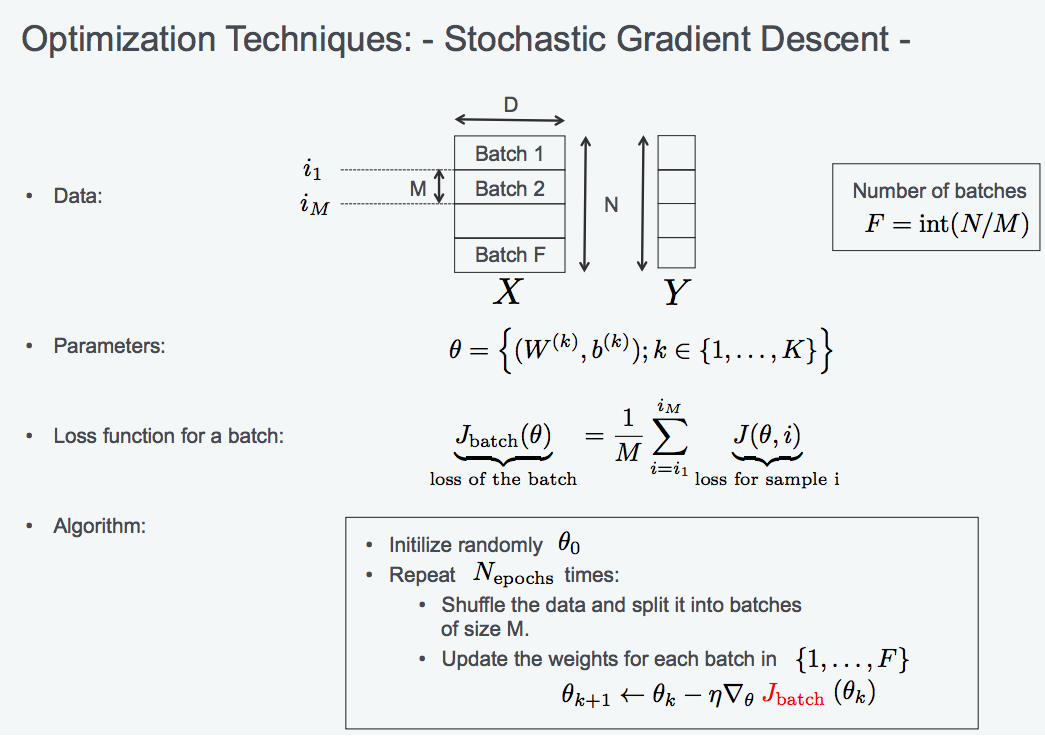

In [ ]:
Image(filename='./gdrive/My Drive/Colab_Notebooks/Session_2/images/SGD.png',  width=700) 

Q8. Fit the model to the data

Epoch 1/20
329/329 [==============================] - 3s 8ms/step - loss: 1.8423 - acc: 0.4352 - val_loss: 1.0388 - val_acc: 0.7461
Epoch 2/20
329/329 [==============================] - 2s 7ms/step - loss: 0.6931 - acc: 0.8158 - val_loss: 0.6631 - val_acc: 0.7806
Epoch 3/20
329/329 [==============================] - 2s 7ms/step - loss: 0.4305 - acc: 0.8781 - val_loss: 0.3943 - val_acc: 0.8849
Epoch 4/20
329/329 [==============================] - 2s 7ms/step - loss: 0.3412 - acc: 0.9037 - val_loss: 0.3287 - val_acc: 0.9016
Epoch 5/20
329/329 [==============================] - 2s 7ms/step - loss: 0.2917 - acc: 0.9165 - val_loss: 0.3827 - val_acc: 0.8836
Epoch 6/20
329/329 [==============================] - 2s 7ms/step - loss: 0.2580 - acc: 0.9265 - val_loss: 0.3657 - val_acc: 0.8886
Epoch 7/20
329/329 [==============================] - 2s 7ms/step - loss: 0.2293 - acc: 0.9334 - val_loss: 0.2623 - val_acc: 0.9225
Epoch 8/20
329/329 [==============================] - 2s 7ms/step - loss: 0.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Q9. Plot the training and the validation loss

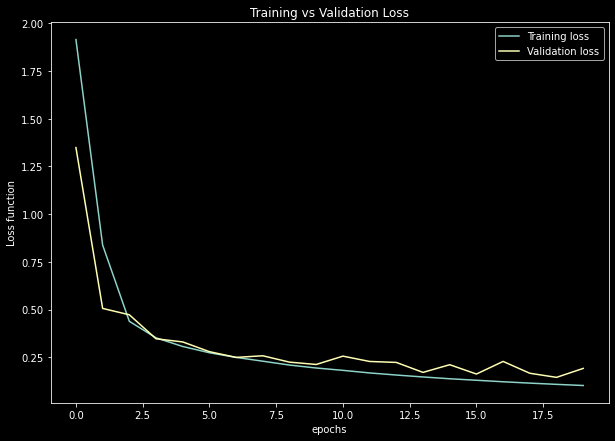

Q10. Plot the training and validation accuracy

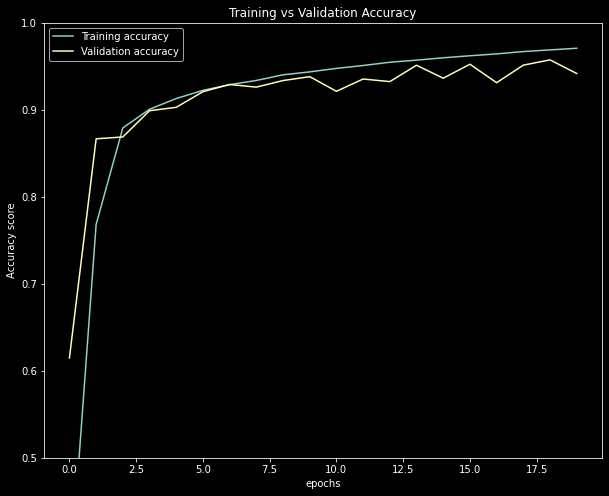

Q11. Evaluate the model on the test data

313/313 [==============================] - 0s 2ms/step - loss: 0.1685 - acc: 0.9470
Test accuracy: 0.9470000267028809


Q12. Use the trained model to make the predictions of the test images. 

Q13. Check if the first prediction is correct

The predicted label is:  7


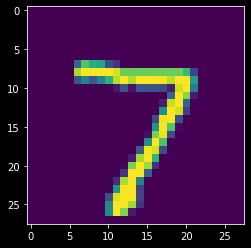

The prediction is correct!

# 4. Fighting Overfitting using Dropout

The choice of the hyperparameters defines the complexity of the model. We would like to find the optimal complexity in order to avoid underfitting or overfitting issues as show in the figure below:

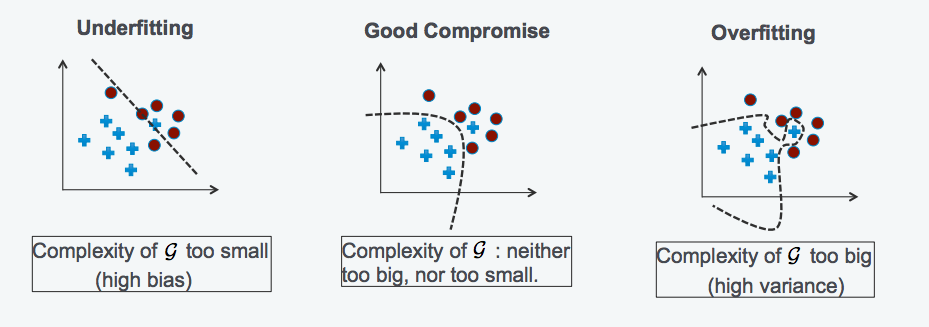

In [ ]:
Image(filename='./gdrive/My Drive/Colab_Notebooks/Session_2/images/Overfitting.png',  width=800) 

One way of avoiding overfitting is to add some regularization techniques like [Dropout](https://keras.io/api/layers/regularization_layers/dropout/). 

Q14. Create the following model, which adds Dropout (with parameter $p=0.2$) to the three first layers of the previous model

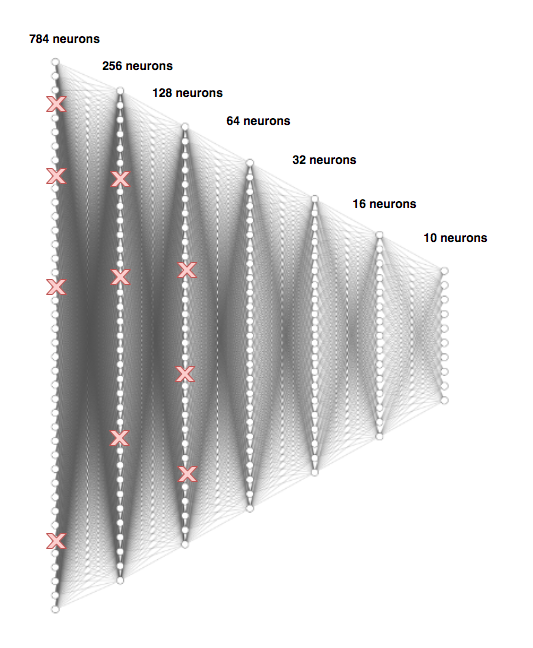

In [ ]:
Image(filename='./gdrive/My Drive/Colab_Notebooks/Session_2/images/model_dropout.png',  width=500) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

Q15. Compile the model

Q16. Fit the model to the data

Epoch 1/20
329/329 [==============================] - 3s 8ms/step - loss: 2.2305 - acc: 0.1528 - val_loss: 2.0515 - val_acc: 0.3176
Epoch 2/20
329/329 [==============================] - 3s 8ms/step - loss: 1.7949 - acc: 0.3929 - val_loss: 1.2071 - val_acc: 0.6406
Epoch 3/20
329/329 [==============================] - 2s 7ms/step - loss: 1.0873 - acc: 0.6464 - val_loss: 0.7523 - val_acc: 0.7713
Epoch 4/20
329/329 [==============================] - 2s 7ms/step - loss: 0.7690 - acc: 0.7557 - val_loss: 0.5697 - val_acc: 0.8227
Epoch 5/20
329/329 [==============================] - 2s 7ms/step - loss: 0.6149 - acc: 0.8101 - val_loss: 0.4299 - val_acc: 0.8732
Epoch 6/20
329/329 [==============================] - 2s 7ms/step - loss: 0.5291 - acc: 0.8389 - val_loss: 0.3662 - val_acc: 0.8931
Epoch 7/20
329/329 [==============================] - 2s 8ms/step - loss: 0.4691 - acc: 0.8582 - val_loss: 0.3307 - val_acc: 0.9034
Epoch 8/20
329/329 [==============================] - 2s 7ms/step - loss: 0.

Q17. Plot the training and validation loss

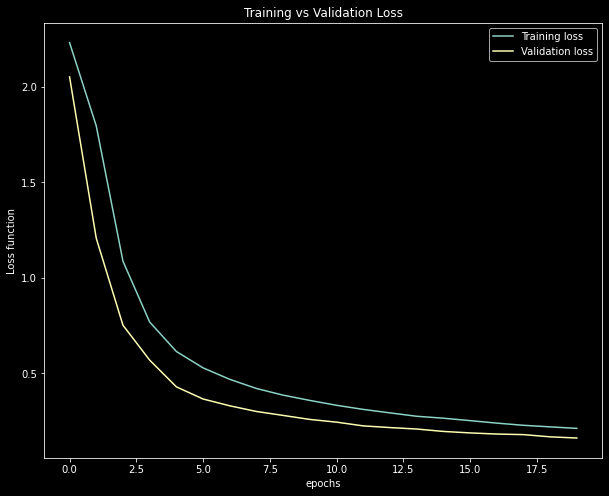

Q18. Plot the training and validation accuracy

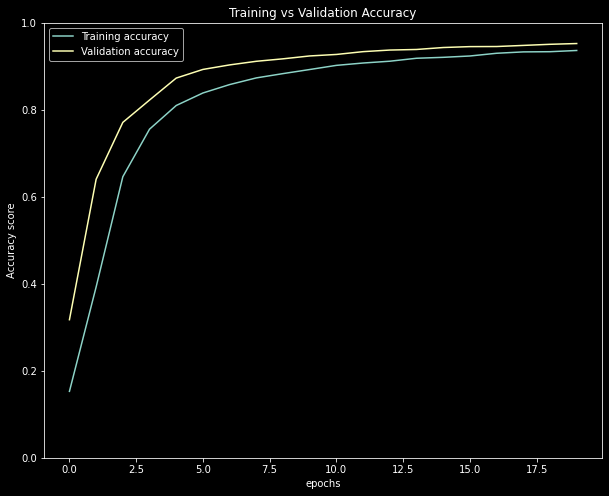

Q19. Evaluate the model on the test data

313/313 [==============================] - 0s 1ms/step - loss: 0.1547 - acc: 0.9540
Test accuracy: 0.9539999961853027


Q20. Predict the labels of the test images

# Exercises

1/ Try different architectures on another dataset like the [fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset from `tensorflow.keras.datasets`. 

This dataset includes 60 000 images for training and 10 000 images for validation. There are 10 different integers labels ranging from 0-9. Each integer represets a specific article of clothing (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)


2/ Perform some hyperparameters tuning using keras tuner. 

In Keras Tuner, the hyperparameters can be of different types (Float, Int, Boolean and Choice) and a unique name.

There are many options you might add to help guide the search need to be set:

  * a minimal, a maximal and a default value and a step value for the **Float** and **Int** types
  * a set of possible values if the type is **Choice**
  * For the hyperparameters like **the learning rate** you might want to add the sampling method (linear, log...)

To perform hyper tuning, we need to define:
  * The space of hyperparameters
  * The model we set up for hypertuning called **hypermodel**

There are many methods:
  * **GridSearch**: which runs the model for all the combinations, which might take some time
  * **Random Search**: which runs the model on a subpart of the Search Space
  * **Hyperband**: Which optimizes Random Search in terms of search time by using EarlyStopping to speed up the tuning process. The idea is to fit a large number of models for a small number of epochs and only continue training for the best models (on validation data of course)

Some references for that 
* [keras Tuner Documentation](https://keras-team.github.io/keras-tuner/)
* [Practical Bayesian Optimization of Machine Learning Algorithms](https://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf)
* [Algorithms for Hyper-Parameter Optimization](https://papers.nips.cc/paper/4443-algorithms-for-hyper-parameter-optimization.pdf)